In this Task we predict the optimum number of clusters
and represent it visually From the given ‘Iris’ dataset. Here we use K-Means Clustering Method.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Here i downloaded the Dataset.
but,if you not getting this Dataset we simply import this Dataset using Sklearn library.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

here we get feature names of given dataset which we use as a column name.

In [3]:
feature_names = (iris.feature_names)
target_names = (iris.target_names)
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

above we imported the dataset using sklearn library but it is in array format so as per requirement we convert it into a DataFrame using Pandas library

In [4]:
iris_df = pd.DataFrame(iris.data,columns=feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


here we get data in our required format.

# Here we find the Optimum number of clusters for k-means.

In [5]:
X = iris_df.iloc[:,[0,1,2,3]].values

#here we import KMeans algorithm using sklearn library
from sklearn.cluster import KMeans
#here we use the very first method is Elbow Method
wcss = []
#here WCSS means Within Cluster Sum of Squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter=300,
                    n_init=10,random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

now here we plotting above result in line graph format

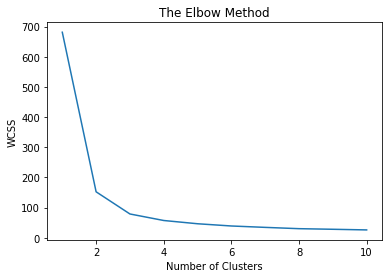

In [6]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

So Here we can clearly see that we get a perfect elbow shape line plot.
here we see the optimum clusters is where the elbow occurs this is when the WCSS doesnt decreases significantly with iterations 

so from above we choose The Number of Clusters = 3

# now we applying the KMeans method on given Dataset

In [7]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,
               n_init=10,random_state=5)
y_kmeans = kmeans.fit_predict(X)

now it fit in a kmeans method.Now  we Visualizing the clusters  

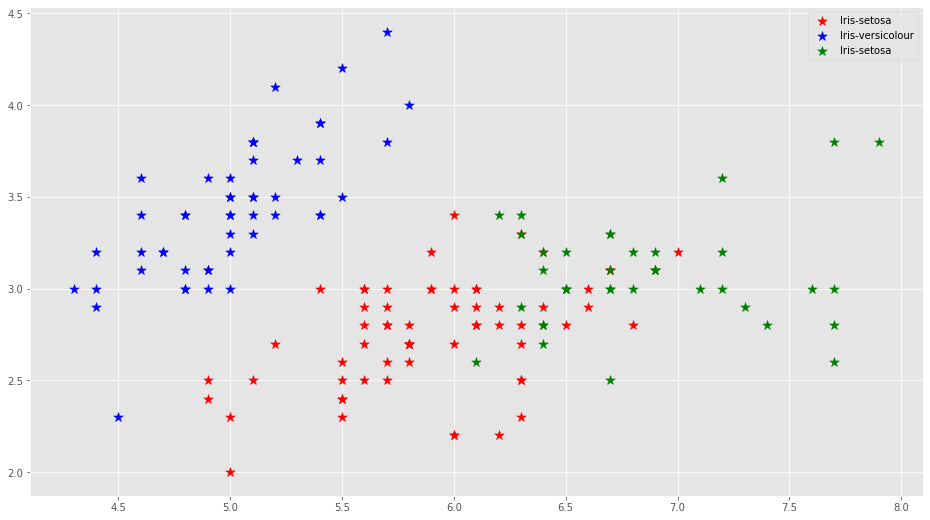

In [8]:
plt.figure(figsize = (16,9))
from matplotlib import style
style.use('ggplot')
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 100,
           c = 'red',label = 'Iris-setosa',marker='*')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 100,
           c = 'blue',label = 'Iris-versicolour',marker='*')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 100,
           c = 'green',label = 'Iris-setosa',marker='*')
plt.legend()

now we plotting Centroids of the clusters in above graph

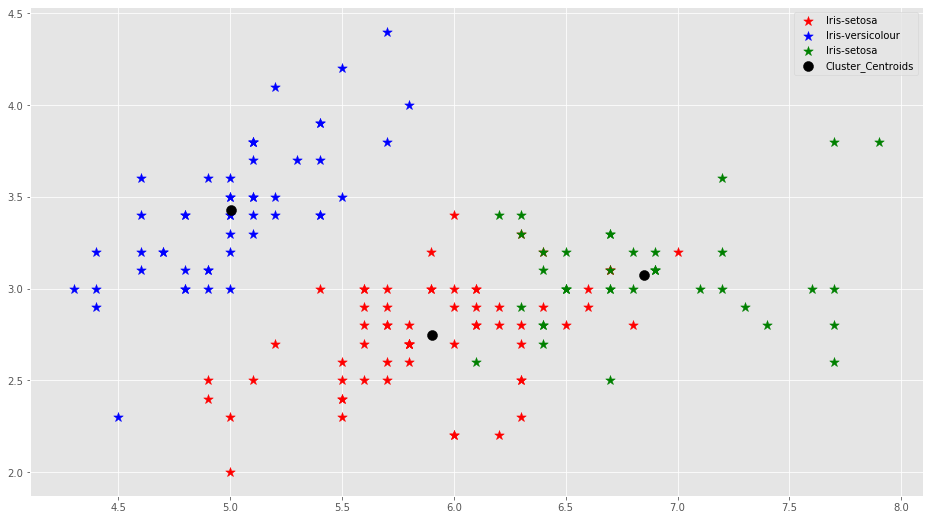

In [9]:
plt.figure(figsize = (16,9))
style.use('ggplot')
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 100,
           c = 'red',label = 'Iris-setosa',marker='*')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 100,
           c = 'blue',label = 'Iris-versicolour',marker='*')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 100,
           c = 'green',label = 'Iris-setosa',marker='*')
#add centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='black',label='Cluster_Centroids')
plt.legend()

Here we represent Cluster centers in Black spot.